# Tarea 3: Programación
**García Fierros Nicky**

## Instrucciones generales
Crea un programa para dibujar lo que se indica.

In [166]:
using Luxor, Colors
include("src/LuxorUtils.jl")
include("src/Circle.jl")
include("src/LuxorCircle.jl")
include("src/MobiusTransformationV1.jl")
include("src/Reticles.jl")
include("src/DrStickler.jl")
include("src/LuxorPoints.jl")

drawpoints (generic function with 2 methods)

## Ejercicio 1
Las órbitas de conjuntos de puntos A, B ⊂ C distintos (por ejemplo, una retícula cuadrada y el Dr. Stickler), bajo la transformación de
Cayley 
$$
K(z) = \frac{z−i}{z+i}
$$
(que es una transformación de Möbius).

In [167]:
drawline(l::Linc) = rule(point(l.base), l.θ)

K = MobT(1, -1, 1, 1)
stickler = 0.1drsticklercoords #.- (0.1-im);
stickler2 = 0.08drsticklercoords .- (0.1-im);
stickler3 = 0.08drsticklercoords .+ (0.1-im);
ret = rectreticle(-1,1,-1,1);
s1 = Circ(0, 1)

CircleComplex(0.0 + 0.0im, 1.0)

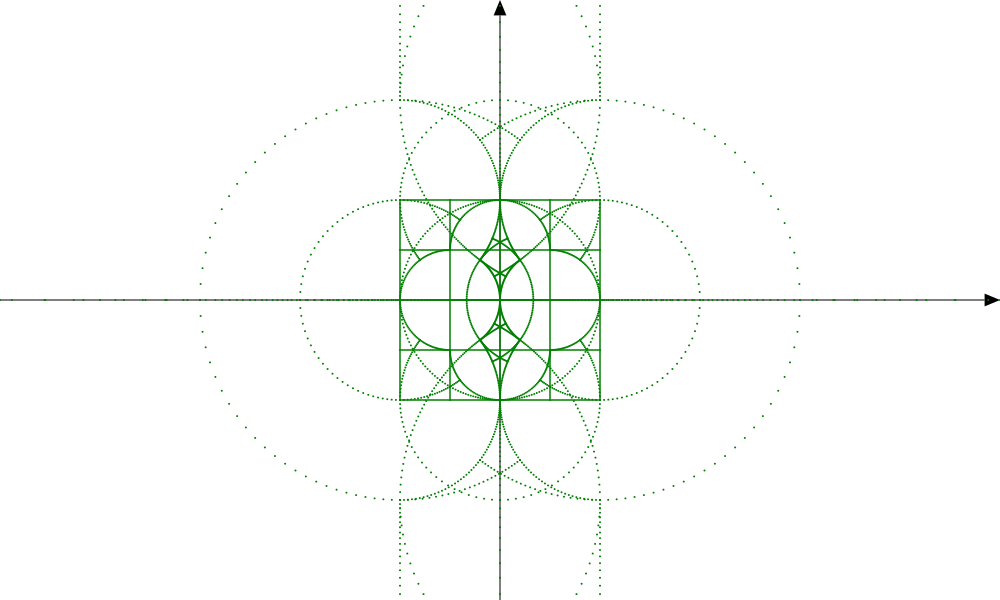

In [168]:
@draw begin
    configurecanvas(-5,5,-3,3,width=1000,height=600); c = s1
    cjto = ret
    for n in 1:4
        cjto = K.(cjto)
        sethue("green"); drawpoints(cjto, 0.01)
    end
end 1000 600

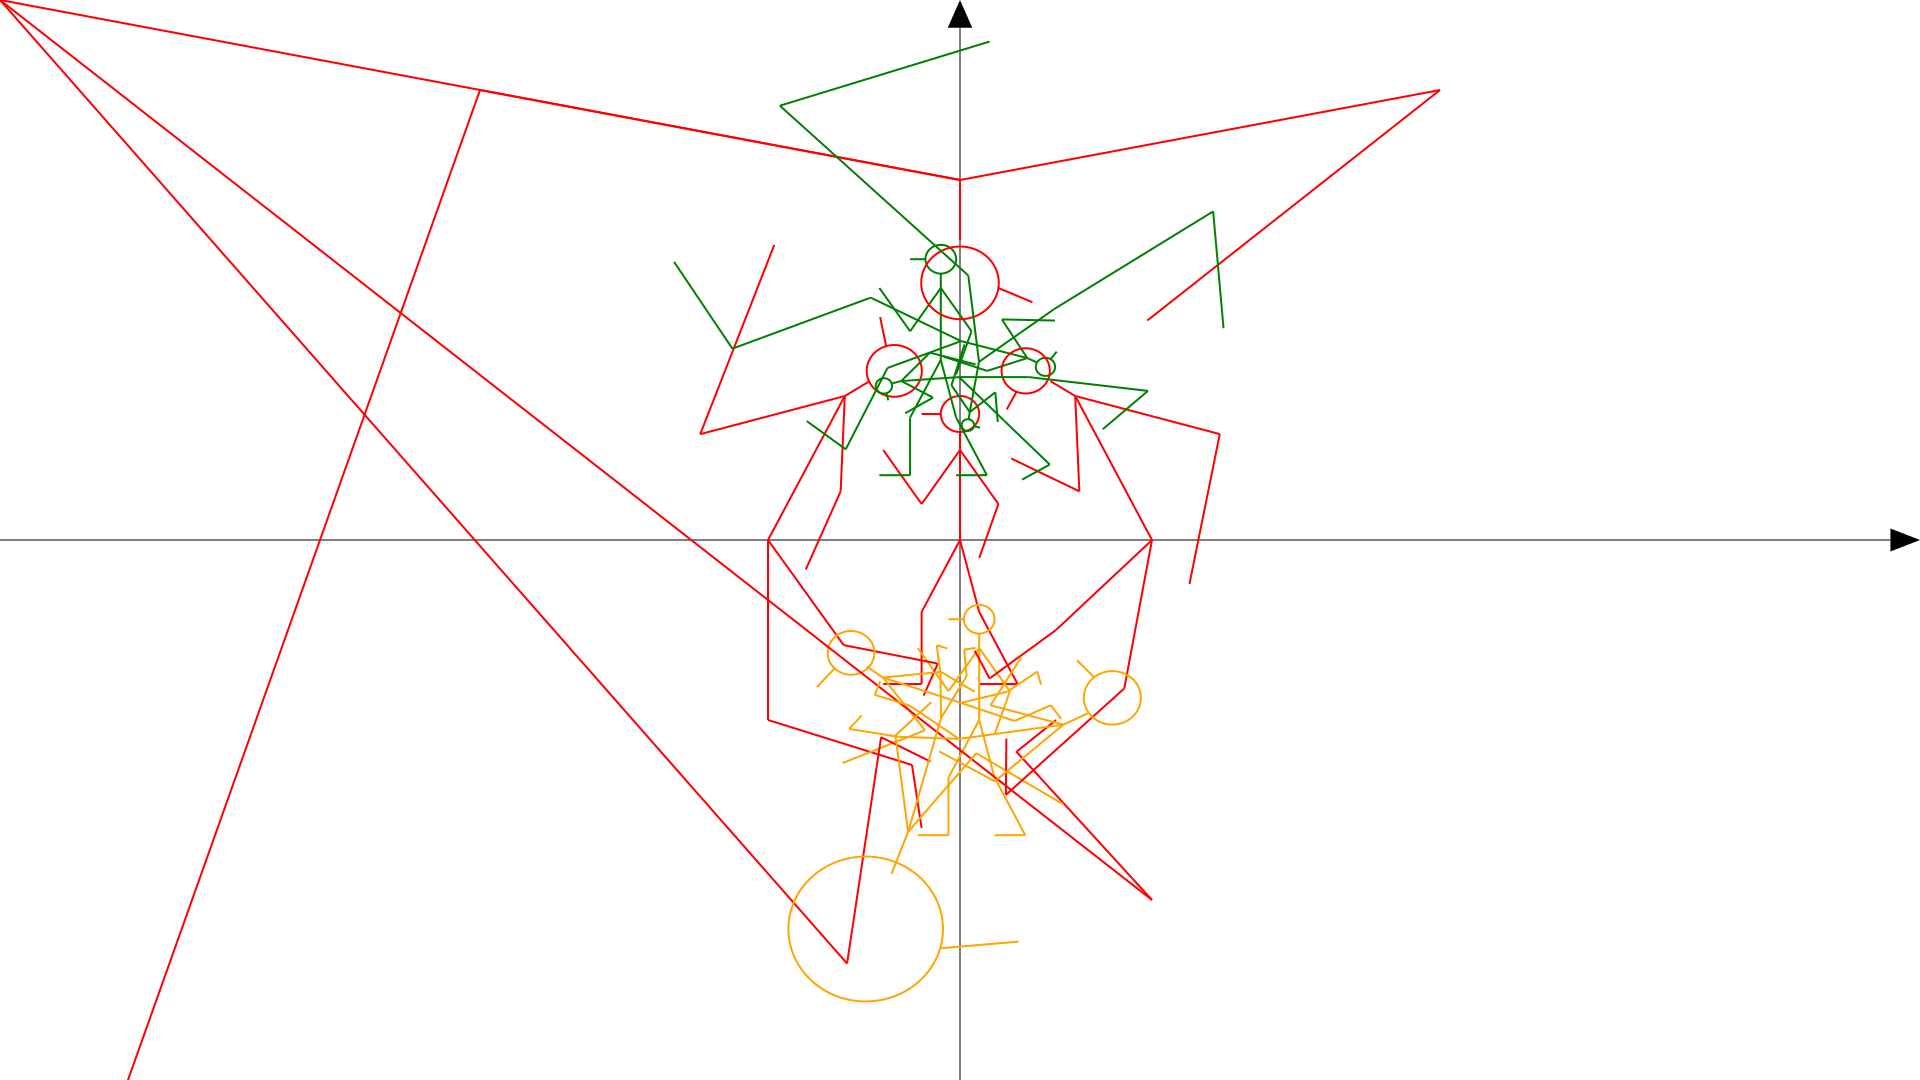

In [169]:
@draw begin
    configurecanvas(-5,5,-3,3,width=1920,height=1080);
    cjto = stickler
    cjto2 = stickler2
    cjto3 = stickler3
    for n in 1:4
        sethue("red"); drawdrstickler(cjto)
        sethue("green"); drawdrstickler(cjto2)
        sethue("orange"); drawdrstickler(cjto3)
        cjto = K.(cjto)
        cjto2 = K.(cjto2)
        cjto3 = K.(cjto3)
    end
end 1920 1080

--------------------------------

### **Ejercicio 2**

Las imágenes de conjuntos de puntos $A, B \in \mathbb{C}$ distintos (por ejemplo, una retícula cuadrada y el Dr. Stickler) bajo tres inversiones en un círculo $I_C : \hat{\mathbb{C}} → \hat{\mathbb{C}}$ distintas. 
Primero crea una struct que represente inversiones, con sus correspondientes constructores y método objeto función para evaluación de puntos (números complejos).

**[1 pt extra].** Implementa la function para componer dos inversiones, cuyo resultado es una transformación de Möbius.

In [170]:
###
#   c :: Circ
#   z ↦ c.center + c.radius^2 / conj(z - c.center)
#
###

import Base: ∘

struct InversionByCircle
    z0::ComplexF64
    r0::Float64

    InversionByCircle(z0::ComplexF64=0, r0::Float64=1) = new(z0, r0)
    InversionByCircle(z0::Number=0, r0::Number=1) = new(z0, r0)
    InversionByCircle(c::Circ) = new(c.center, c.radius)
end

const InvByCirc = InversionByCircle

InversionByCircle

In [171]:
## Inversa de una inversión por círculo
inverse(IC::InvByCirc) = IC


## Función evaluación de la inversión por círculo
function (IC::InvByCirc)(z::ComplexF64)
    if z == IC.z0
        return Inf
    end

    if z == Inf
        return IC.z0
    end

    # Si z está en el círculo, entonces la inversión es la identidad
    if abs(z - IC.z0) == IC.r0
        return z
    end

    return IC.z0 + IC.r0^2 / conj(z - IC.z0)
end


De la parte de teoría se probó que la composición de dos inversiones en círculos distintos es una transformación de Möbius. Tras realizar operaciones algebráicas resultó una transformación de Möbius

$$
    z \mapsto \frac{az+b}{cz+d}
$$

donde

$$
\begin{align*}

    a &= r_{C}^2 + z_C \overline{z_{D}} - z_C \overline{z_C}\\ 
      &= r_{C}^2 + z_C \overline{z_{D}} - |z_C|^2\\
    b &= -z_{D}r_{C}^2 + z_Cr_{D}^2 + z_Cz_{D} \overline{z_C} - z_C z_{D} \overline{z_{D}}\\ 
      &= -z_{D}r_{C}^2 + z_Cr_{D}^2 + z_{D} |z_C|^2 - z_C |z_{D}|^2\\
    c &= \overline{z_{D}} - \overline{z_C}\\
    d &= -z_{D}(\overline{z_{D}} - \overline{z_C}) + r_{D}^2\\ 
      &= z_{D} \overline{z_C} - |z_{D}|^2 + r_{D}^2
\end{align*}
$$

In [172]:
∘(IC::InvByCirc, ID::InvByCirc) = MobT(
    IC.r0^2 + IC.z0*conj(ID.z0) - abs(IC.z0)^2,
    -ID.z0*(IC.r0^2) + IC.z0*(ID.r0^2) + ID.z0*abs(IC.z0)^2 - IC.z0*abs(ID.z0)^2,
    conj(ID.z0 - IC.z0),
    ID.z0*conj(IC.z0) - abs(ID.z0)^2 + ID.r0^2
)

compose(IC::InvByCirc, ID::InvByCirc) = IC∘ID

compose (generic function with 2 methods)

A continuación se dibujan los conjuntos que pide el ejercicio.

In [173]:
S1 = Circ(0, 1);
C = Circ(2.5+2.5im, 2);
D = Circ(-1 - 2im, 1.5);

IS1 = InvByCirc(); # Ver qué onda con los problemas de casting
IC = InvByCirc(C);
ID = InvByCirc(-1-2im, 1.5); # Ver qué onda con los problemas de casting

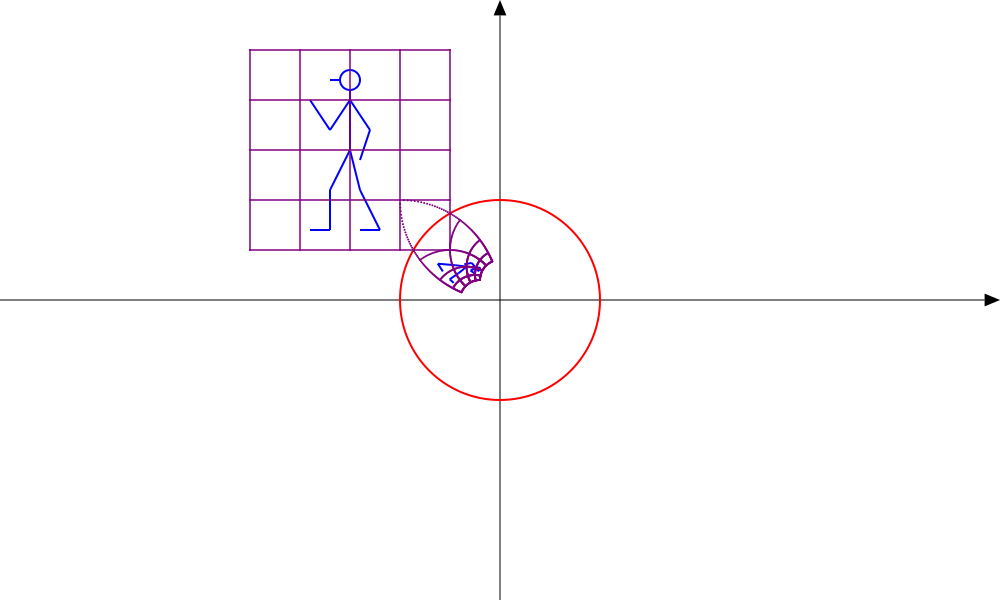

In [174]:
stickler = 0.1drsticklercoords .- (1.5-1.5im);
ret = rectreticle(-1,1,-1,1).- (1.5-1.5im);

@draw begin
    configurecanvas(-5,5,-3,3,width=1000,height=600); c = S1; I = IS1
    sethue("red"); drawcircle(c);
    sethue("blue"); drawdrstickler(stickler); drawdrstickler(I.(stickler));
    sethue("purple"); drawpoints(ret); drawpoints(I.(ret));
    
end 1000 600

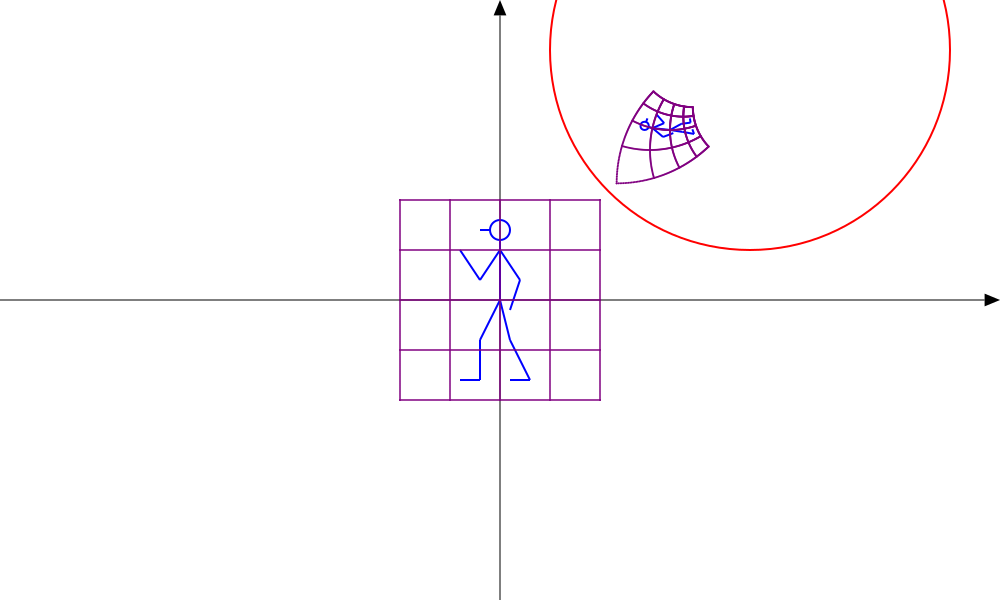

In [175]:
stickler = 0.1drsticklercoords; #.- (0.1-im);
ret = rectreticle(-1,1,-1,1);

@draw begin
    configurecanvas(-5,5,-3,3,width=1000,height=600); c = C; I = IC
    sethue("red"); drawcircle(c);
    sethue("blue"); drawdrstickler(stickler); drawdrstickler(I.(stickler));
    sethue("purple"); drawpoints(ret); drawpoints(I.(ret));
    
end 1000 600

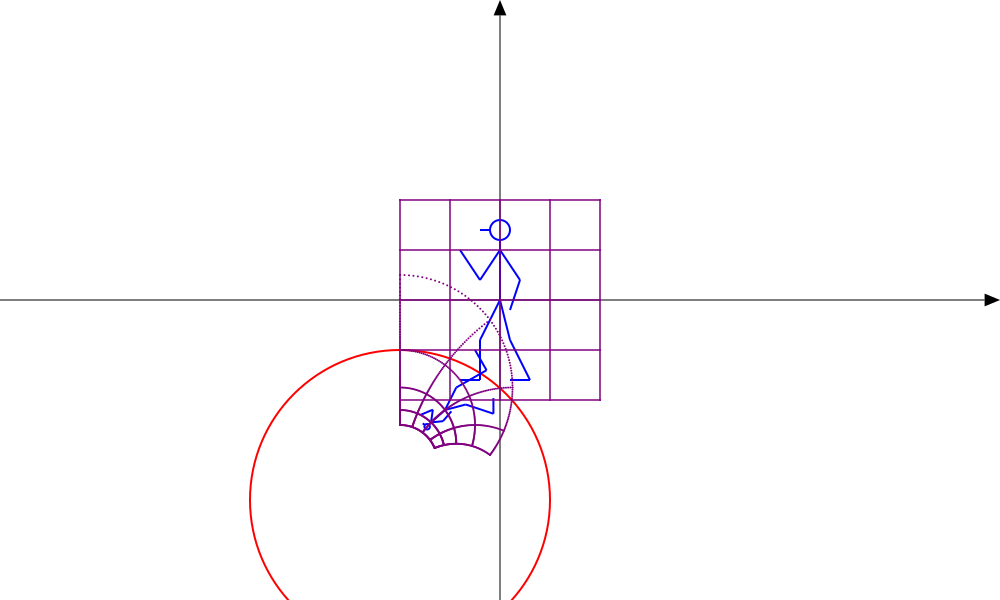

In [176]:
stickler = 0.1drsticklercoords; .- (0.5-im);
ret = rectreticle(-1,1,-1,1);

@draw begin
    configurecanvas(-5,5,-3,3, width=1000,height=600); c = D; I = ID
    sethue("red"); drawcircle(c);
    sethue("blue"); drawdrstickler(stickler); drawdrstickler(I.(stickler));
    sethue("purple"); drawpoints(ret); drawpoints(I.(ret));
    
end 1000 600

-----------------------------

### **Ejercicio 3**

Las imágenes, bajo una transformación de Möbius $T(z) = \frac{az+b}{cz + d}$ tales que $c \neq 0$, de varias rectas paralelas que no contengan el polo de $T$.

Primero implementa el método para objeto función con los cálculos del ejercicio 3 de teoría. (En la implementación completa faltaría el caso con polo finito de $T$ en la recta $L$, pero no es necesario que realicen los cálculos para esto ni la implementación del caso.)

In [177]:
struct Reflection
    z0::ComplexF64
    θ::Float64
    
    Reflection(z::Number=0, a::Real=0) = new(z,a)
    Reflection(L::Linc) = new(L.base, L.θ)
end

function (T::Reflection)(z::Number)
    if isinf(z)
        return Inf
    end
    
    complex(cos(2T.θ),sin(2T.θ))*conj(z - T.z0) + T.z0
end

In [178]:
function (T::MobT)(L::Linc)
    if iszero(T.c)
        return L
    end
    
    # Suponemos que pole(T) no esta en L y que el polo es finito
    RefL = Reflection(L)
    z1 = T(RefL(pole(T)))
    r1 = abs(z1 - T(L.base))
    Circ(z1, r1)

end

polo de T: -0.0 + 0.0im


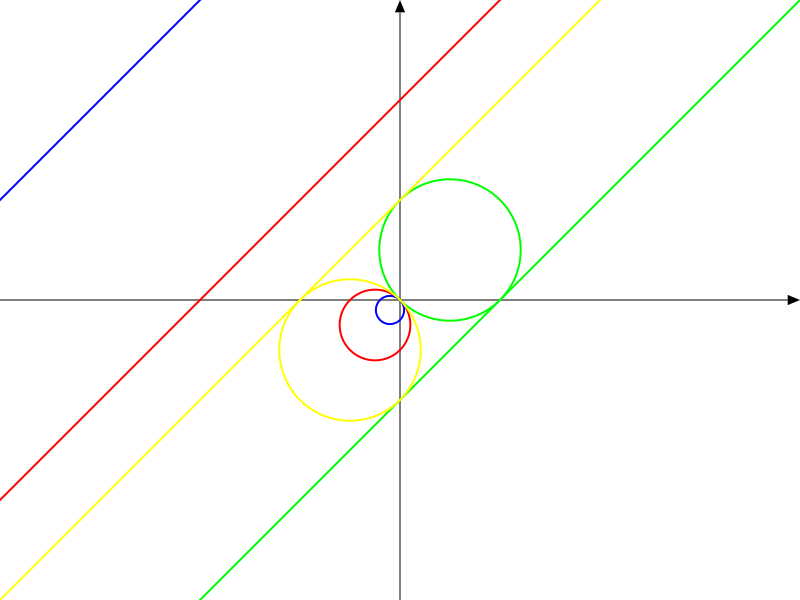

In [179]:
lines = [Linc(1 + 3im, π/4), Linc(1, π/4), Linc(-3+2im, π/4), Linc(1im, π/4)];

colors = [RGB(1,0,0), RGB(0,1,0), RGB(0,0,1), RGB(1,1,0)]

T = MobT(0, 1, 1, 0)
println("polo de T: ", pole(T))

@draw begin
    configurecanvas(-4,4,-3,3 ,width=800,height=600);
    for n in 1:4
        line = lines[n]; setcolor(colors[n]); drawline(line)
        TL = T(line); drawcircle(TL)

    end
end 800 600

### **Ejercicio 4**

La red de Steiner de una transformación de Möbius parabólica cuyo punto fijo es finito, indicando con diferentes colores las dos familias ortogonales de círculos.

In [192]:
β = 2 + 1im
Tβ = MobT(1, β, 0, 1)
z0 = 1 + 0.25im
S = MobT(0, 1, 1, -z0)
S_1 = inverse(S)

θ = angle(β)

T = Sinv ∘ Tβ ∘ S
T

MobiusTransformation(-2.76 - 1.48im, 1.3899999999999997 + 1.93im, -2.0 - 1.0im, 0.75 + 1.5im)

In [193]:
circles0(r::Real, n::Int) = [ Circ(0, k*r) for k in 1:n ]
lines0(n::Int) = [ Linc(0, k*θ) for k in 0:(n-1) ]
circles0exp(r::Real, n::Int) = [ Circ(0, exp(k)) for k in (-n*r/2):r:(n*r/2) ]

#A10 = circles0(1, 10);
#B10 = lines0(10);

n = 10
A10 = [ Linc(k*im, θ) for k in (-n-1):1:(n-1)]
B10 = [ Linc(k*im, 1/θ) for k in (-n-1):1:(n-1)]

S_1A10 = S_1.(A10);
S_1B10 = S_1.(B10);


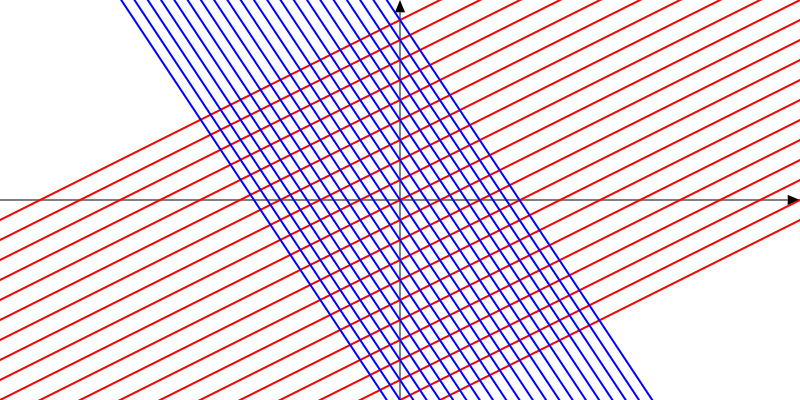

In [182]:
@draw begin
    configurecanvas(-20,20,-10,10,width=800)
    sethue("red"); [ drawline(c) for c in A10 ]
    sethue("blue"); [ drawline(l) for l in B10 ]    
end 800 400

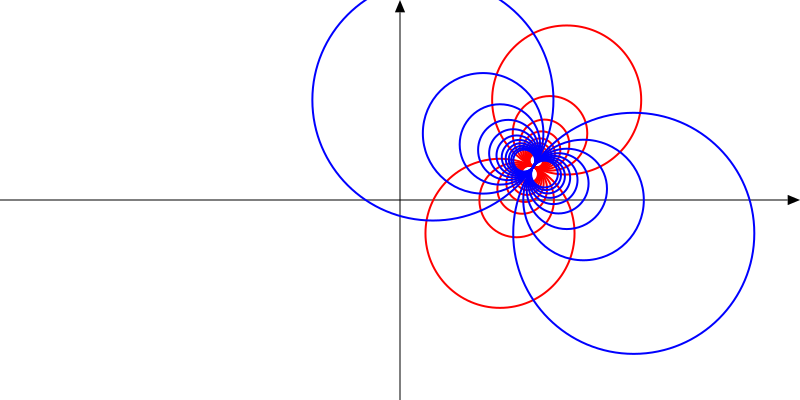

In [194]:
@draw begin
    configurecanvas(-3,3,-1.5,1.5,width=800)
    sethue("red"); [ c isa Circ ? drawcircle(c) : drawline(c) for c in S_1A10 ]
    sethue("blue"); [ c isa Circ ? drawcircle(c) : drawline(c) for c in S_1B10 ]    
end 800 400